In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# import data

In [9]:
data = sns.load_dataset("penguins")

In [10]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [11]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Dataset explanation

“Artwork by @allison_horst”

### Meet the Palmer penguins
<img src='species_illustration.png' 
align="center"
width = "400"
/>

* Bill dimensions: 

<img src='Bill_illustration.png' 
align="center"
width = "400"
/>

# Quick visualisation

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

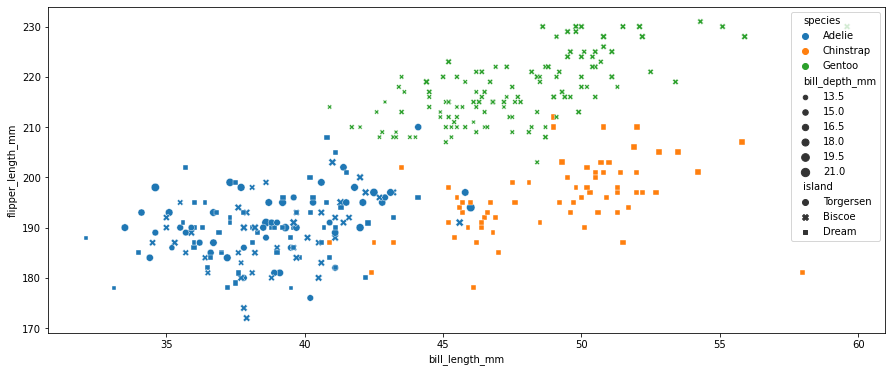

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=data, x="bill_length_mm", y="flipper_length_mm", size='bill_depth_mm', style="island", hue='species', ax=ax)

# Species classification of penguins

In [13]:
#import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Feature selection by random forest classifier 

<AxesSubplot:xlabel='importance', ylabel='feature'>

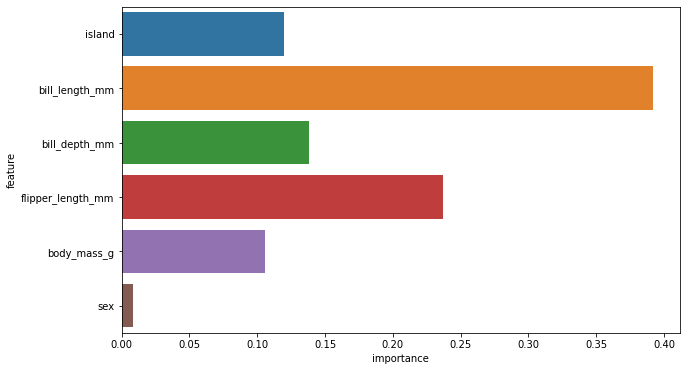

In [14]:
#feature selection
data = data.dropna() #drop rows with missing values

#label encoding species & island
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])


#label encoding island
le_island = LabelEncoder()
data['island'] = le_island.fit_transform(data['island'])

#binary encoding sex
le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])



rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(data.drop(columns=['species']), data['species'])

#feature importance
importance = pd.DataFrame({'feature': data.drop(columns=['species']).columns, 'importance': rf.feature_importances_})
#importance.sort_values(by='importance', ascending=True, inplace=True)

#plot feature importance
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=importance, x='importance', y='feature', ax=ax)




## prepare the data for the model 

In [21]:
#train test split
#keep only the 2 most important features
features = importance.tail(5)['feature'].values
X_train, X_test, y_train, y_test = train_test_split(data[features], data['species'], test_size=0.2, random_state=0)

rf = RandomForestClassifier(n_estimators=400, min_samples_split=2, max_depth = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=400)

### Score of the model 

[Text(0, 0.5, 'Adelie'), Text(0, 1.5, 'Chinstrap'), Text(0, 2.5, 'Gentoo')]

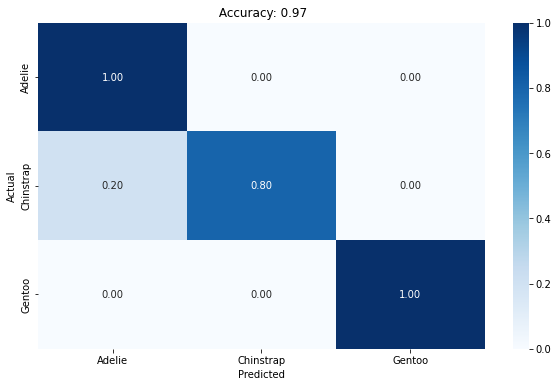

In [24]:
#predict on test set
y_pred = rf.predict(X_test)

#plot the confusion matrix in % of total
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax, cmap='Blues', fmt='.2f')
#add accuray score to the plot (as title) 2 decimal places
ax.set_title(f' Accuracy: {accuracy_score(y_test, y_pred):.2f}')
#add labels to the plot
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
# tick labels for x axis (species) reversed the label encoding
ax.set_xticklabels(le.inverse_transform([0, 1, 2]))
# tick labels for y axis (species) reversed the label encoding
ax.set_yticklabels(le.inverse_transform([0, 1, 2]))

# Visualisation of tree

In [25]:
#visualize the decision tree
from sklearn.tree import plot_tree

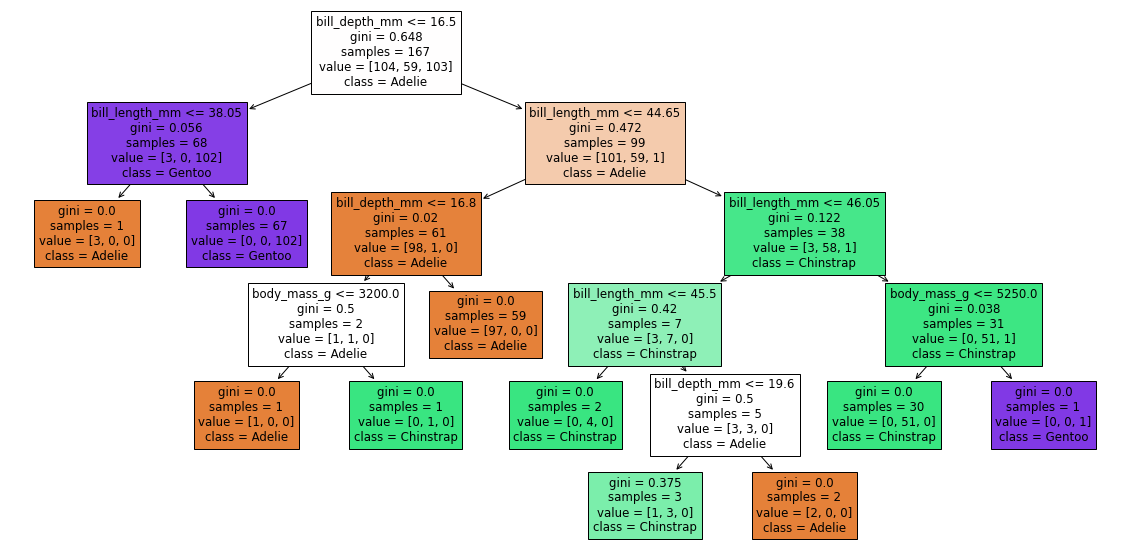

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
pt = plot_tree(rf.estimators_[0], feature_names=features, class_names=le.inverse_transform([0, 1, 2]), ax=ax, filled=True)
